# Importing the needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# Load the dataset

In [2]:
df=pd.read_csv('Cleaned_Employee_Attrition_dataset.csv')
df.tail(20)


,Unnamed: 0,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,Education,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,label
7190,7190,3.000000,4.000000,3.000000,25,1,1,1,1,1,1,4,2,109320,1.000000,11,1.000000,1,1,0,3,3,1
7191,7191,3.636068,2.000000,3.000000,37,2,1,2,3,0,2,6,1,27430,2.455726,21,5.731111,3,0,2,3,3,1
7192,7192,3.601719,2.194842,3.000000,42,2,0,8,2,1,3,3,0,74666,3.406878,12,15.636108,4,0,3,3,3,1
7193,7193,1.020444,1.020444,3.986371,32,1,1,1,2,0,1,2,1,51474,6.959112,11,12.918224,8,1,6,2,3,1
7194,7194,2.476593,2.000000,2.476593,41,1,1,2,2,1,2,4,2,25756,5.187257,16,10.000000,8,5,7,3,3,1
7195,7195,4.000000,1.000000,3.000000,35,2,1,2,3,1,3,0,1,23210,9.000000,12,15.000000,13,6,0,3,3,1
7196,7196,2.187922,3.000000,3.000000,38,2,1,16,4,1,2,6,1,101877,1.751690,13,19.805319,18,12,7,3,3,1
7197,7197,1.000000,3.000000,1.000000,21,1,1,20,2,0,4,6,2,53370,1.000000,14,2.000000,2,2,2,3,3,1
7198,7198,4.000000,1.000000,1.000000,37,2,1,24,3,1,1,2,2,137580,1.000000,11,10.000000,10,0,8,3,3,1
7199,7199,1.000000,2.647462,3.323731,28,1,1,7,3,1,2,4,0,29824,3.589847,17,1.971192,1,0,0,3,3,1


### separating te independent variable from the dependent variables

In [3]:
# Dependent or Target variable
y=df['label']

# Independent or predictor variables
X=df.drop(['label','Unnamed: 0'], axis=1)


### splitting data into a training set and test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)


X_train : (5768, 21)
X_test : (1442, 21)


## Normalization 
Scaling the the predictor variable 

In [5]:
from sklearn.preprocessing import StandardScaler
# Step 1: Fit the StandardScaler on the training set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Step 2: Use the same scaling parameters on the test set
X_test = scaler.transform(X_test)

In [6]:
X_train

array([[ 1.26181894,  0.38125379, -2.3597388 , ...,  1.32264439,
         0.47805846,  2.58070273],
       [-1.50235544, -0.56242093,  0.40133451, ..., -0.76276212,
         0.47805846, -0.38749136],
       [-0.58096398, -0.56242093,  0.40133451, ..., -0.4648469 ,
        -0.89312065,  2.58070273],
       ...,
       [ 0.46741943,  1.32492851, -0.1937967 , ..., -0.4648469 ,
         0.47805846, -0.38749136],
       [ 0.71758653, -1.13449944,  0.40133451, ...,  0.13098353,
        -0.89312065, -0.38749136],
       [ 0.34042748, -1.50609565, -0.17547685, ...,  1.02472917,
        -0.89312065, -0.38749136]])

### Traing and Testing a Random Forest Algorithm with hyperparameter turning (model optimization)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [100,200],
    'max_features': ['sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}


rf_grid = HalvingGridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=10)

# fitting the model for grid search
rf_grid.fit(X_train, y_train)
# print best parameter after tuning
print(rf_grid.best_params_)
y_pred = rf_grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy)

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}
Accuracy: 99.72260748959778


### Evaluating Random Forest

Training Accuracy : 1.0
Testing Accuracy : 0.9972260748959778

CLASSIFICATION REPORT

              precision    recall  f1-score   support

      Stayed       1.00      1.00      1.00       728
        Left       1.00      1.00      1.00       714

    accuracy                           1.00      1442
   macro avg       1.00      1.00      1.00      1442
weighted avg       1.00      1.00      1.00      1442



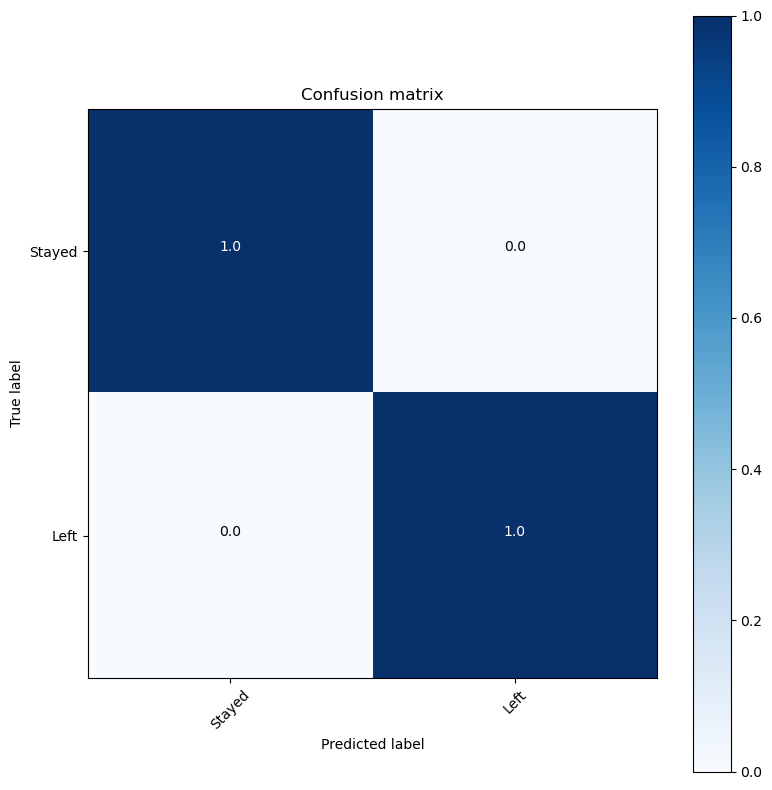

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
print('Training Accuracy :',rf_grid.score(X_train, y_train))
print('Testing Accuracy :',rf_grid.score(X_test,y_test))
con_mat = pd.DataFrame(confusion_matrix(rf_grid.predict(X_test), y_test),
            columns = ['Predicted: Stayed', 'Predicted:Left'],
            index = ['Actual:Stayed', 'Actual:Left'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(rf_grid.predict(X_test), y_test,
                            target_names =['Stayed','Left']))
print('=================================================================')

def plot_confusion_matrix(cm, class_names):
    """
  Returns a matplotlib figure containing the plotted confusion matrix.

  Args:
    cm (array, shape = [n, n]): a confusion matrix of integer classes
    class_names (array, shape = [n]): String names of the integer classes
  """
    import itertools
    # Normalize the confusion matrix.
    cm = np.around(cm.astype("float") / cm.sum(axis=1)[:, np.newaxis], decimals=2)

    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    
    # Conusion metrix
cm = confusion_matrix(y_test, rf_grid.predict(X_test)) #confusion matrix
classname = ['Stayed','Left']
plot_confusion_matrix(cm, classname) #plot confusion matrix

In [1]:
import Joblib

# Serializing using joblib
Joblib.dump(rf_grid, 'RF_model')

ModuleNotFoundError: No module named 'Joblib'